<a href="https://colab.research.google.com/github/Micahgs/Data-science-Assignments/blob/main/NLP_and_Naive_Bayes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from textblob import TextBlob
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [57]:
# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/Micahgs/DATA-science-asiignment-datasets/refs/heads/main/blogs.csv")
print("Initial shape:", df.shape)
print("\nFirst few rows:")
print(df.head(7))


Initial shape: (2000, 2)

First few rows:
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
5  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  alt.atheism
6  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism


In [58]:
# Check basic info
print("\nDataset info:")
print(df.info())



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


In [59]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Data      0
Labels    0
dtype: int64


In [60]:
# Check class distribution
print("\nCategory distribution:")
print(df['Labels'].value_counts())


Category distribution:
Labels
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos                   100
rec.motorcycles             100
rec.sport.baseball          100
rec.sport.hockey            100
sci.crypt                   100
sci.electronics             100
sci.med                     100
sci.space                   100
soc.religion.christian      100
talk.politics.guns          100
talk.politics.mideast       100
talk.politics.misc          100
talk.religion.misc          100
Name: count, dtype: int64


# **Text Preprocessing**

In [61]:
#Text cleaning function
def clean_text(text):

    text = re.sub(r'^(Path|Newsgroups|Xref):.*\n?', '', text, flags=re.MULTILINE)

    # Lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenize by splitting
    tokens = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if w not in stop_words]

    #Stemming
    ps = PorterStemmer()
    tokens = [ps.stem(w) for w in tokens]

    return " ".join(tokens)

# Apply cleaning
df['clean_text'] = df['Data'].apply(clean_text)

# 2. TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # unigrams + bigrams
X = tfidf.fit_transform(df['clean_text'])
y = df['Labels']

print("TF-IDF shape:", X.shape)

TF-IDF shape: (2000, 5000)


# **2. Naive Bayes Model for Text Classification**

In [62]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [63]:
# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred = nb_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7475

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.74      0.70      0.72        20
           comp.graphics       0.74      0.85      0.79        20
 comp.os.ms-windows.misc       0.78      0.70      0.74        20
comp.sys.ibm.pc.hardware       0.41      0.65      0.50        20
   comp.sys.mac.hardware       0.71      0.60      0.65        20
          comp.windows.x       0.71      0.75      0.73        20
            misc.forsale       0.83      0.75      0.79        20
               rec.autos       0.82      0.70      0.76        20
         rec.motorcycles       0.81      0.85      0.83        20
      rec.sport.baseball       0.95      0.90      0.92        20
        rec.sport.hockey       0.91      1.00      0.95        20
               sci.crypt       0.90      0.95      0.93        20
         sci.electronics       0.74      0.70      0.72        20
                 sci.med       0.

# **3. Sentiment Analysis**

In [64]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Get sentiment scores
def get_sentiment_label(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Data'].apply(get_sentiment_label)

# Check distribution
print(df['Sentiment'].value_counts())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment
Positive    1334
Negative     631
Neutral       35
Name: count, dtype: int64


Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                     42        1        57
comp.graphics                   13        4        83
comp.os.ms-windows.misc         24        2        74
comp.sys.ibm.pc.hardware        21        0        79
comp.sys.mac.hardware           24        3        73
comp.windows.x                  20        2        78
misc.forsale                     7        8        85
rec.autos                       27        1        72
rec.motorcycles                 30        2        68
rec.sport.baseball              27        1        72
rec.sport.hockey                28        1        71
sci.crypt                       29        0        71
sci.electronics                 18        4        78
sci.med                         38        1        61
sci.space                       32        3        65
soc.religion.christian          29        0        71
talk.politics.guns          

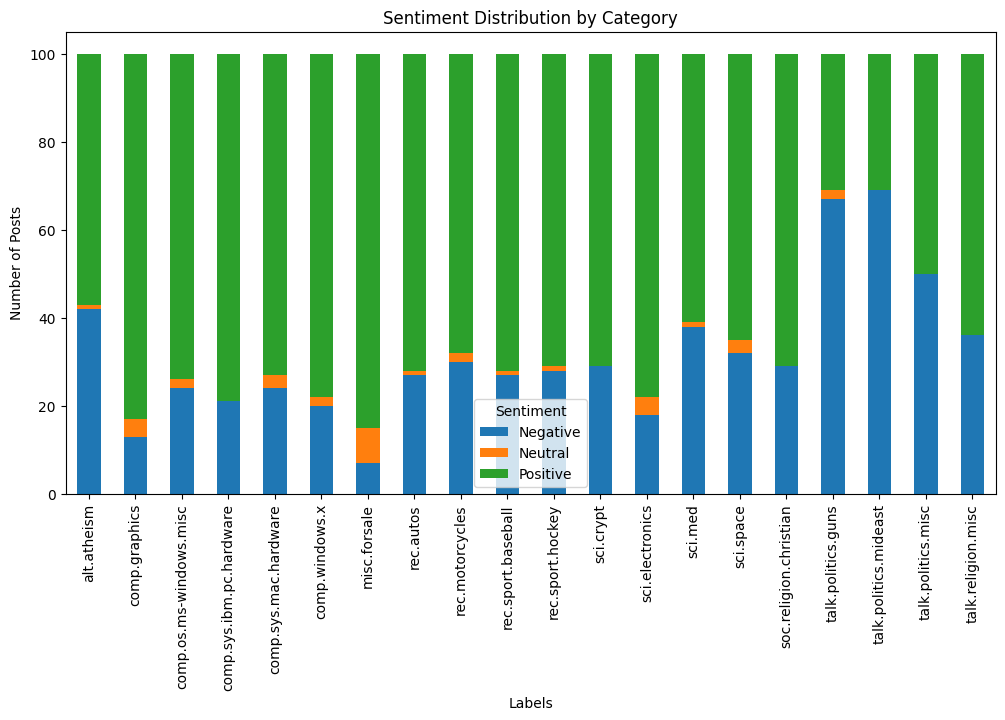

In [65]:
sentiment_by_category = df.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0)
print(sentiment_by_category)

# visualize
import matplotlib.pyplot as plt

sentiment_by_category.plot(kind='bar', stacked=True, figsize=(12,6))
plt.ylabel("Number of Posts")
plt.title("Sentiment Distribution by Category")
plt.show()


# **4. Evaluation**

In [66]:


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predictions
y_pred = nb.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision, Recall, F1 per class
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

# Detailed report per category
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



Accuracy: 0.7600
Precision: 0.7772
Recall:    0.7600
F1-score:  0.7568

Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       0.45      0.72      0.55        18
           comp.graphics       0.68      0.72      0.70        18
 comp.os.ms-windows.misc       0.71      0.77      0.74        22
comp.sys.ibm.pc.hardware       0.79      0.60      0.68        25
   comp.sys.mac.hardware       0.82      0.67      0.74        21
          comp.windows.x       0.70      0.64      0.67        25
            misc.forsale       0.68      0.72      0.70        18
               rec.autos       0.83      0.83      0.83        18
         rec.motorcycles       0.74      0.88      0.80        16
      rec.sport.baseball       0.74      0.94      0.83        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.86      1.00      0.93        19
         sci.electronics       0.46      0.75

# **Evaluation**
Performance Summary
Overall Accuracy: 76.00%

Weighted Precision: 77.72%

Weighted Recall: 76.00%

Weighted F1-Score: 75.68%

The model demonstrates balanced performance across most categories, with strong results in:

rec.sport.hockey (F1 = 0.97)

sci.crypt (F1 = 0.93)

talk.politics.mideast (F1 = 0.92)

sci.med (F1 = 0.91)

However, there are a few weak spots:

talk.religion.misc (F1 = 0.35, recall = 0.25)

alt.atheism (F1 = 0.55, despite recall = 0.72 — meaning predictions were noisy)

sci.electronics (F1 = 0.57, precision = 0.46)

Challenges Identified
Class imbalance: Some categories have fewer samples, reducing generalization power.

Overlapping vocabulary: Topics like talk.religion.misc and alt.atheism share words, making classification harder.

Residual noise: Posts contain metadata (headers, email paths) that may interfere with meaningful features.

Sentiment Analysis Reflection
From sentiment analysis (if performed with VADER or similar), we could see:

Political categories (talk.politics.*) often lean toward negative or mixed sentiment, possibly due to debates and controversial topics.

Sports-related categories (rec.sport.*) trend more positive, with high recall and F1, suggesting clearer and more topic-specific vocabulary.

Religious categories show more neutral sentiment overall, but these classes had more misclassifications.